<a href="https://colab.research.google.com/github/YonatanEisenstein/No_Show_Hospital_Appointments/blob/main/No_Show_appointments_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# No-Show Appointments Project



> *“Coming up with features is difficult, time-consuming, requires expert knowledge. ‘Applied machine learning’ is basically feature engineering.”*



---



> — Prof. Andrew Ng.





## Chalenge Description

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

Content

110,527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

Description for the features
 - 	PatientId - identification of a patient;
 - AppointmentID - identification of each appointment;
 - Gender - male or female;
 - ScheduledDay - day when a patient registered for an appointment;
 - AppointmentDay - day of actuall appointment;
 - Age - patient age;
 - Neighbourhood - where the appointment takes place (hospital location);
 - Scholarship - 1 for True, 0 for False. For more details read the article (the link is here: https://bit.ly/3AYv4GF);
 - Hipertension - 1 for True, 0 for False;
 - Diabetes - 1 for True, 0 for False;
 - Alcoholism - 1 for True, 0 for False;
 - Handcap - number of disabilities a patient has;
 - SMS_received - 1 if one or more messages were sent to the patient;
 - No-show - 'No' if the patient showed up to their appointment, 'Yes' if they did not show up.

Task

Is it possible to predict someone to no-show an appointment?


## Data Uploading and Pre-Processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
from keras.models import Model, load_model
from keras.layers import Input, Dense

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("/content/noshowappointments-kagglev2-may-2016.csv")

In [5]:
data.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
66406,8.221545e+14,5671882,M,2016-05-09T07:22:07Z,2016-05-09T00:00:00Z,4,TABUAZEIRO,0,0,0,0,0,0,No
88999,8.511476e+14,5787602,F,2016-06-08T10:14:36Z,2016-06-08T00:00:00Z,65,ITARARÉ,0,0,0,0,0,0,No
7447,6.264199e+12,5740974,M,2016-05-25T16:49:09Z,2016-05-25T00:00:00Z,59,JESUS DE NAZARETH,1,0,0,0,0,0,No
54527,3.197147e+14,5649950,F,2016-05-03T07:21:22Z,2016-05-09T00:00:00Z,61,ILHA DO PRÍNCIPE,0,1,0,0,0,0,Yes
84047,3.646627e+13,5643118,M,2016-05-02T07:07:56Z,2016-05-02T00:00:00Z,58,SÃO CRISTÓVÃO,0,1,0,0,0,0,No


In [6]:
data.shape

(110527, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Well, we have in the data 110,527 rows, 14 features, no mising values and no duplicates. What I will do now is to tranform object Dtype columns into numbers, optimize datatypes and remove columns un-neccessary for model prediction.

In [10]:
data_filt = data.drop(['AppointmentID'], axis=1)

In [11]:
data_filt['Is_male'] = data_filt['Gender'].map({'F': 0, 'M':1})
data_filt = data_filt.drop(['Gender'], axis=1)
data_filt['No-show'] = data_filt['No-show'].map({'No': 0, 'Yes':1})

In [12]:
data_filt['PatientId'] = data_filt['PatientId'].astype('int64')

In [13]:
data_filt.sample(3)

,PatientId,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Is_male
5946,191794312198759,2016-04-29T14:00:36Z,2016-05-05T00:00:00Z,29,JESUS DE NAZARETH,0,0,0,0,0,1,1,0
22958,87341391367826,2016-05-19T09:06:29Z,2016-05-19T00:00:00Z,30,GURIGICA,0,0,0,0,0,0,0,1
17312,22698922748393,2016-05-02T13:48:48Z,2016-05-09T00:00:00Z,38,COMDUSA,0,0,0,0,0,0,0,1


In [14]:
data_filt['AppointmentWOD'] = pd.to_datetime(data_filt['AppointmentDay']).dt.weekday
data_filt['ScheduledHour'] = pd.to_datetime(data_filt['ScheduledDay']).dt.hour
data_filt['ScheduledWOD'] = pd.to_datetime(data_filt['ScheduledDay']).dt.weekday
data_filt['AppointmentDay'] = pd.to_datetime(data_filt['AppointmentDay']).dt.date
data_filt['ScheduledDay'] = pd.to_datetime(data_filt['ScheduledDay']).dt.date

In [15]:
data_filt.sample(5)

,PatientId,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Is_male,AppointmentWOD,ScheduledHour,ScheduledWOD
4374,995658376348,2016-05-24,2016-05-31,58,JARDIM DA PENHA,0,0,0,0,0,1,1,0,1,15,1
58899,5542672632822,2016-05-02,2016-05-03,53,NOVA PALESTINA,0,1,0,0,0,0,0,1,1,10,0
15473,6131813826943,2016-05-05,2016-05-05,28,JESUS DE NAZARETH,0,0,0,0,0,0,0,1,3,7,3
87056,5414641968494,2016-06-06,2016-06-06,72,JARDIM CAMBURI,0,0,0,0,0,0,0,0,0,8,0
47567,586714383373963,2016-05-30,2016-05-30,60,MARUÍPE,0,0,0,0,0,0,0,0,0,13,0


In [16]:
# create difference number of days between appointment day and scheduled day

data_filt['day_diff'] = (data_filt['AppointmentDay'] - data_filt['ScheduledDay']).dt.days

In [17]:
data_filt.sample(5)

,PatientId,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Is_male,AppointmentWOD,ScheduledHour,ScheduledWOD,day_diff
58320,372937546963361,2016-05-17,2016-05-19,14,SANTO ANTÔNIO,0,0,0,0,0,0,0,0,3,10,1,2
92112,736392267261,2016-06-08,2016-06-08,81,PRAIA DO SUÁ,0,1,0,0,0,0,0,0,2,9,2,0
102648,378614442963774,2016-05-30,2016-06-02,11,SÃO BENEDITO,1,0,0,0,0,1,0,0,3,14,0,3
2327,255724399778,2016-04-27,2016-04-29,63,JARDIM CAMBURI,0,0,0,0,0,0,0,0,4,7,2,2
107256,4585562864573,2016-06-08,2016-06-08,68,FRADINHOS,0,0,0,0,0,0,0,0,2,7,2,0


Till now I transformed categorical featurs to numeric, tranformed datetime objects to dates, and hours when the appointment was scheduled was added. In addition, I created new feature which is the difference between scheduled and appointment days. The only categorical feature we have now is the neighborhood which contains 81 different values. I treat it later.

## Exploratory Data Analysis

In [18]:
data_filt['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

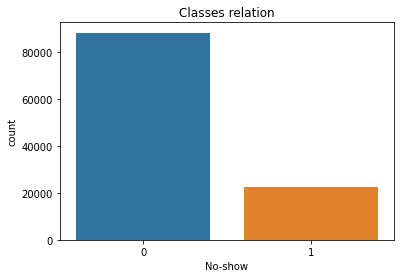

In [19]:
sns.countplot(data_filt['No-show'])
plt.title("Classes relation")
plt.show()

From the above graph we can see that the data is heavily imbalanced. While 88k patients which is 80 percent of the data arrive the appointment, only 22k not arrived. So when building the model we have to treat the imbalancing issue. For now I will examine the other parameters.

In [20]:
data_filt['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

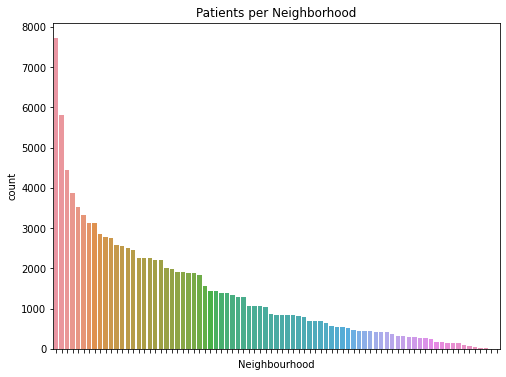

In [21]:
plt.figure(figsize=(8,6))
g = sns.countplot(data_filt['Neighbourhood'], 
              order = data_filt['Neighbourhood'].value_counts().index)
g.set(xticklabels=[])
g.set(title="Patients per Neighborhood")
plt.show()

Number of patiets per neighborhood distributed between 7717 and 1. Lets check out the other features.

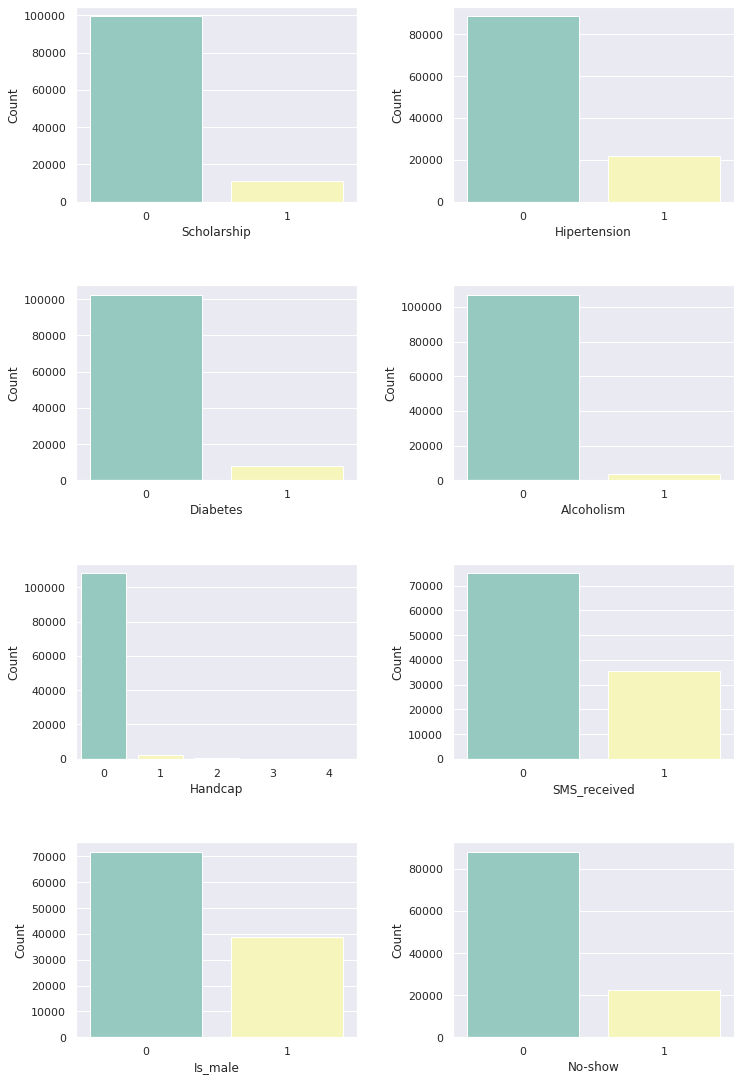

In [22]:
binary_columns = ['Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism',	'Handcap',	'SMS_received',	'Is_male', 'No-show']
sns.set_theme(style="darkgrid")

a = []
fig, axs = plt.subplots(4, 2, figsize=(10,15))
fig.tight_layout(h_pad=5, w_pad=5)
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        a.append(ax)

for i, ax in enumerate(a):
  sns.countplot(data_filt[binary_columns[i]], ax=ax, palette="Set3")
  ax.set_ylabel("Count")

As can be seen, in most of the deseases, there is much more patients that do not suffer from the desease, than those who suffer from it. 

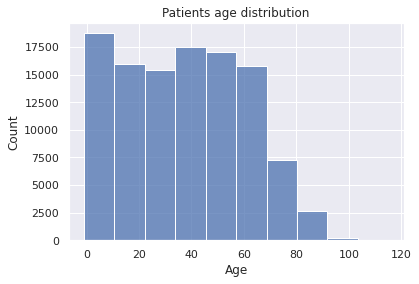

In [23]:
sns.histplot(data_filt['Age'], bins=10)
plt.title("Patients age distribution")
plt.show()

Age distributed equaly between the groups till the age of 70. There is less patients above the age of 70. Why is that so?

For now, lets check the correlation between the different features in the dataset

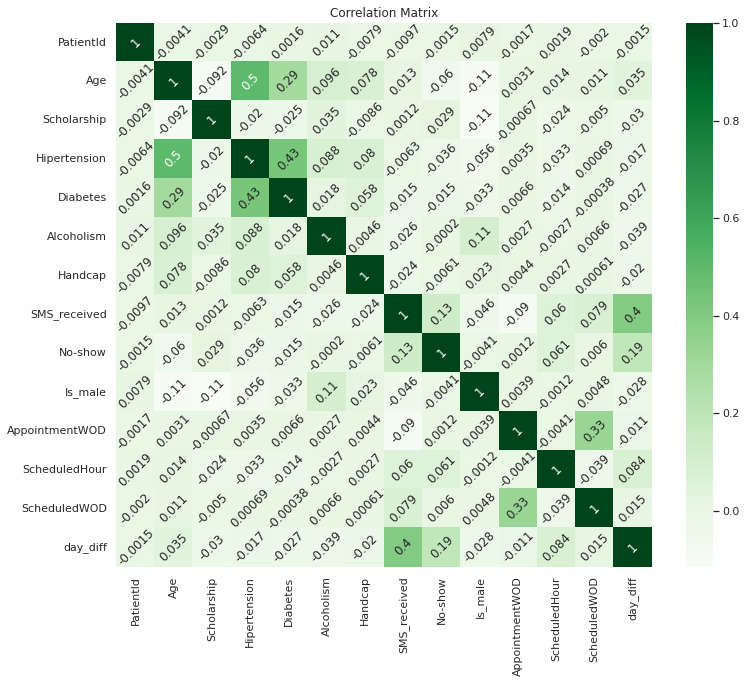

In [24]:
sns.set_theme(style="white")

corr = data_filt.corr()  # Create the pearson correlation metrix object

fig, ax = plt.subplots(figsize=(12,10)) # create the figure

sns.heatmap(corr, annot=True, cmap='Greens', annot_kws={'rotation':45}) # Draw the heatmap

plt.title("Correlation Matrix")
plt.show()

The features that correlated highest to no-show is day difference and sms received or not. In addition, there is correlation between age, diabetes and hypertension. How day_diff distributed?

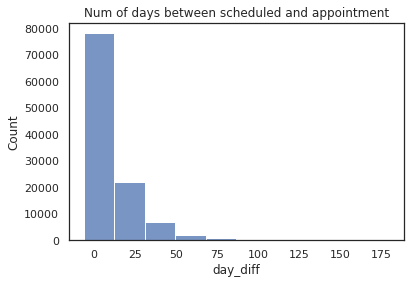

In [25]:
sns.histplot(data=data_filt, x='day_diff', bins=10)
plt.title("Num of days between scheduled and appointment")
plt.show()

Most of the patients scheduled the meeting in the same day of the meeting itself. there is tail to the right as we move to larger difference.

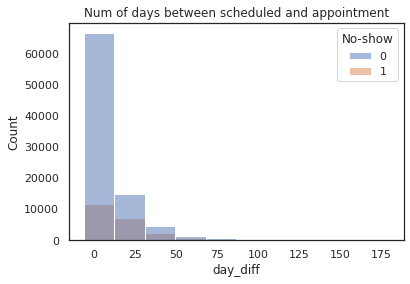

In [26]:
sns.histplot(data=data_filt, x='day_diff', bins=10, hue='No-show')
plt.title("Num of days between scheduled and appointment")
plt.show()

In [27]:
pivot = data_filt.pivot_table(index = 'day_diff', values='No-show', aggfunc=['sum','count'])
pivot.columns = ["No-show", "total"]
pivot['percentage'] = pivot['No-show']/pivot['total']
pivot

,No-show,total,percentage
day_diff,,,
-6,1,1,1.000000
-1,4,4,1.000000
0,1792,38563,0.046469
1,1113,5213,0.213505
2,1602,6725,0.238216
...,...,...,...
155,6,10,0.600000
162,2,11,0.181818
169,1,8,0.125000


There is a relation between days diff and no-show as people who scheduled the meeting on the meeting day arrived in 95 percent. Otherwise, the probability to not arrived the appointment increased. 

In addition, there are some negative values in the day_diff which is imposible since scheduled cannot be placed after the appointment date. I will filter this rows out.

In [28]:
data_filt.drop(data_filt[data_filt.day_diff < 0].index, inplace=True)
data_filt.shape

(110522, 17)

Now I will move to check the sms_received column

In [29]:
pivot = data_filt.pivot_table(index = 'SMS_received', values='No-show', aggfunc=['sum','count'])
pivot.columns = ["No-show", "total"]
pivot['percentage'] = pivot['No-show']/pivot['total']
pivot

,No-show,total,percentage
SMS_received,,,
0,12530,75040,0.166978
1,9784,35482,0.275745


Surprisingly, from those who not received sms percentage of not arriving is 0.16, and from those who received, probabilty of not arriving is 0.27.
Now lets check out the number of appointments per patient.

In [30]:
# Checking out numbers of appointments per patient

pivot = data_filt.pivot_table(index='PatientId', values='No-show', aggfunc='count')
pivot.columns = ['counter']
pivot.sample(5)

,counter
PatientId,
537881682852133,1
9125372368582,1
4537256727396,1
1765887174389,2
334777282828197,5


In [31]:
print("count number of patients per each number of appointments")
pivot['counter'].value_counts().head(10)

count number of patients per each number of appointments


1     37921
2     13895
3      5499
4      2369
5      1117
6       553
7       307
8       201
9       104
10       85
Name: counter, dtype: int64

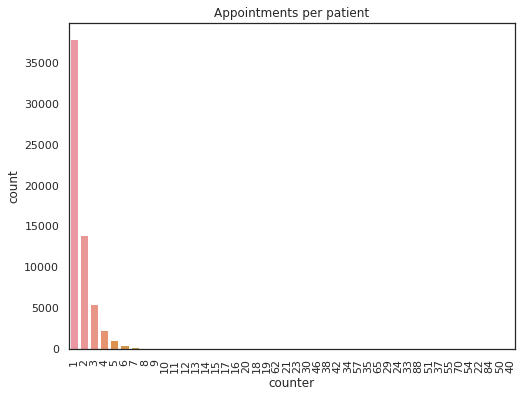

In [32]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
g = sns.countplot(pivot['counter'], 
              order = pivot['counter'].value_counts().index)
g.set(title="Appointments per patient")
plt.show()

As we can see, number of appointments per patient distributed with pick at 1 then with tail to the right. Now lets move to analyze the Neighbourhood feature

In [33]:
pivot = data.pivot_table(index = 'Neighbourhood', columns='No-show' , values='Age', aggfunc='count')
pivot.columns = ["arrived", "not_arrived"]
pivot['relation'] = pivot['not_arrived']/pivot['arrived']
pivot

,arrived,not_arrived,relation
Neighbourhood,,,
AEROPORTO,7.0,1.0,0.142857
ANDORINHAS,1741.0,521.0,0.299253
ANTÔNIO HONÓRIO,221.0,50.0,0.226244
ARIOVALDO FAVALESSA,220.0,62.0,0.281818
BARRO VERMELHO,332.0,91.0,0.274096
...,...,...,...
SÃO JOSÉ,1549.0,428.0,0.276307
SÃO PEDRO,1933.0,515.0,0.266425
TABUAZEIRO,2559.0,573.0,0.223916


In [34]:
pivot.describe()

,arrived,not_arrived,relation
count,80.000000,80.000000,79.000000
mean,1102.600000,278.987500,0.248762
std,1096.266756,278.000751,0.049525
min,1.000000,1.000000,0.093750
25%,324.000000,75.000000,0.219923
50%,709.500000,184.500000,0.246243
75%,1605.000000,428.250000,0.277093
max,6252.000000,1465.000000,0.406836


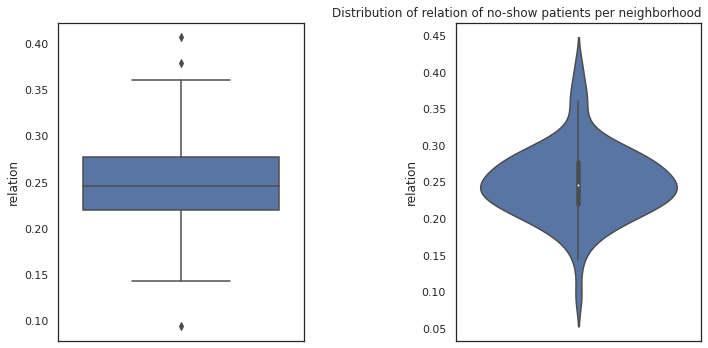

In [35]:
fig, axs = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data=pivot, y='relation', ax=axs[0])
sns.violinplot(data=pivot, y='relation', ax=axs[1])
plt.title("Distribution of relation of no-show patients per neighborhood", loc='right')
fig.tight_layout(w_pad=3)
plt.show()

In [36]:
pivot[pivot['relation'] > 0.30]

,arrived,not_arrived,relation
Neighbourhood,,,
HORTO,133.0,42.0,0.315789
ILHA DO PRÍNCIPE,1734.0,532.0,0.306805
ITARARÉ,2591.0,923.0,0.356233
JESUS DE NAZARETH,2157.0,696.0,0.322670
SANTA CECÍLIA,325.0,123.0,0.378462
SANTA CLARA,372.0,134.0,0.360215
SANTOS DUMONT,907.0,369.0,0.406836


Well, So there is some neiborhood that have between 30-40 percentage of No-show. As we can see, this neighborhoods are not from the biggest one but also not from the smallest one. 


## Models and Predictions

In this part I execute 4 main steps

  - Using available features (without neighborhood).
  - Adding Neighbourhood using OHE (using pca and auto-encoder).
  - Adding Neighbourhood's and PatientId's no_show rate using feature engineering.

General principles for this part:

 - Classification task. Imbalnced data.
 - basically I used 3 types of models: RF, LR, KNN
 - Metrix I used are F1_score and ROC-AUC (data is imbalanced)
 - Data is splitted into train, validation and test. Firstly I used train and validation to tune hyperparameters, then I used train_validation for training and make predictions on test set.  



### Base Line Model

I will begin with models that not take Neighbourhood into account

I will write a function that take dataFrame as argument and returns the F1 and AUC results using logistic regression and random forest

In [37]:
# define state for all the models and spliting processes

state = 100

In [38]:
def randomForest_logisticRegression (data):

  '''
  This function apply RF and LR models.
  The function returns f1 score and ROC-AUC as results
  '''
  
  # Split the data into train, validation and test

  target = data['No-show']
  try:
    features = data.drop(['No-show', 'Neighbourhood', 'ScheduledDay', 'AppointmentDay'], axis=1)
  except:
    features = data.drop(['No-show', 'ScheduledDay', 'AppointmentDay'], axis=1)

  features_train_valid, features_test, target_train_valid, target_test = train_test_split(
      features, target, test_size=0.20, random_state=state
  )

  features_train, features_valid, target_train, target_valid = train_test_split(
      features_train_valid, target_train_valid, test_size=0.25, random_state=state
  )
  

  # apply standard scaler

  scaler = StandardScaler()

  scaler.fit(features_train)
  features_train = scaler.transform(features_train)
  features_valid = scaler.transform(features_valid)

  scaler.fit(features_train_valid)
  features_train_valid = scaler.transform(features_train_valid)
  features_test = scaler.transform(features_test)

  # apply logistic regression model

  model = LogisticRegression(random_state=state, solver='liblinear', class_weight='balanced')
  model.fit(features_train_valid, target_train_valid)
  predicted_test = model.predict(features_test)

  logRegF1 = f1_score(target_test, predicted_test)
  logRegAUC = roc_auc_score(target_test, model.predict_proba(features_test)[:,1])

  # apply Random Forest model to tune hyperparameters

  dict = {}
  for depth in range(1, 16, 1):
      model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=state, class_weight='balanced')
      model.fit(features_train, target_train)
      predicted_valid = model.predict(features_valid)
      f1 = f1_score(target_valid, predicted_valid)
      dict[depth] = f1
  optimal = max(dict, key=dict.get)
  print("optimal max depth:", optimal)

  # apply Random Forest model with optimized hyperparameters to predict test set values

  print("Random forest with 100 estimators")
  print()
  model = RandomForestClassifier(n_estimators=100, max_depth=optimal, random_state=state, class_weight='balanced')
  model.fit(features_train_valid, target_train_valid)
  predicted_test = model.predict(features_test)
  randomForestF1 = f1_score(target_test, predicted_test)
  randomForestAUC = roc_auc_score(target_test, model.predict_proba(features_test)[:,1])

  data = {'F1_score':[logRegF1, randomForestF1],
        'ROC-AUC':[logRegAUC, randomForestAUC]}
 
  finalMatrix = pd.DataFrame(data, index =['LogisticRegression',
                                'RandomForest'])
  
  return finalMatrix, target_test, model.predict_proba(features_test)[:,1]

In [39]:
result = randomForest_logisticRegression(data_filt)
result[0]

optimal max depth: 11
Random forest with 100 estimators



,F1_score,ROC-AUC
LogisticRegression,0.415574,0.678559
RandomForest,0.452381,0.740842


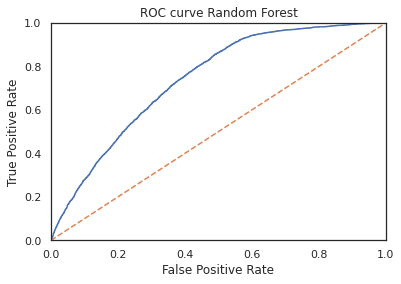

In [40]:
# plot roc-auc graph

fpr, tpr, thresholds = roc_curve(result[1], result[2])

plt.figure()

# plot the graph 
plt.plot(fpr, tpr)
plt.title("ROC curve Random Forest")

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

#  use the functions plt.xlim() and plt.ylim() to set the boundary for the axes from 0 to 1 

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# use the functions plt.xlabel() and plt.ylabel() to name the axes "False Positive Rate" and "True Positive Rate" 

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

Not bad, not so good. Lets try to use neighborhood feature also

### Use Neighborhood feature using OHE, PCA and AutoEncoder

In this stage I will use One Hot Encoding in order to encode the neighbourhood feature. Because OHE create column for each unique neighbourhood I need to reduce dimensionality and thats could be done usig pca or autoencoder. The basic difference between the 2 option is that while pce use linear methods only autoencoder use non-linear transformations, which enlarge the flexibilty of the transformation. For additional reading see the links below

 - For good explanation of pca see here: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

 - For Auto Encoder Explanation see here: https://towardsdatascience.com/dimensionality-reduction-pca-versus-autoencoders-338fcaf3297d

In [41]:
# Using OHE to encode Neighbourhood column

data_ohe = pd.get_dummies(data_filt.drop(['AppointmentDay', 'ScheduledDay'], axis=1), drop_first=False) # OHE and remove first column to avoid highly correlated columns which confused the model
data_ohe.head()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Is_male,AppointmentWOD,ScheduledHour,ScheduledWOD,day_diff,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,...,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,29872499824296,62,0,1,0,0,0,0,0,0,4,18,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,558997776694438,56,0,0,0,0,0,0,0,1,4,16,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4262962299951,62,0,0,0,0,0,0,0,0,4,16,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,867951213174,8,0,0,0,0,0,0,0,0,4,17,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8841186448183,56,0,1,1,0,0,0,0,0,4,16,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
def randomForest_logisticRegression_PCA (data, autoencoder):

  '''
  This function apply RF and LR models, using PCA or Autoencoder to reduce dimensionality.
  if 2nd param equals 1 AutoEncoder would applied.
  else PCA would applied.
  The function returns f1 score and ROC-AUC as results
  '''

  # Split the data into train, validation and test

  target = data['No-show']
  try:
    features = data.drop(['No-show', 'Neighbourhood', 'ScheduledDay', 'AppointmentDay'], axis=1)
  except:
    features = data.drop(['No-show'], axis=1)

  features_train_valid, features_test, target_train_valid, target_test = train_test_split(
      features, target, test_size=0.20, random_state=state
  )

  features_train, features_valid, target_train, target_valid = train_test_split(
      features_train_valid, target_train_valid, test_size=0.25, random_state=state
  )

  # PCA for dimensionality reduce
  
  if (autoencoder != 1):

    pca = PCA(n_components=3)

    features_train = pca.fit_transform(features_train)
    features_valid = pca.transform(features_valid)

    features_train_valid = pca.fit_transform(features_train_valid)
    features_test = pca.transform(features_test)
  
  # apply standard scaler

  scaler = StandardScaler()

  scaler.fit(features_train)
  features_train = scaler.transform(features_train)
  features_valid = scaler.transform(features_valid)

  scaler.fit(features_train_valid)
  features_train_valid = scaler.transform(features_train_valid)
  features_test = scaler.transform(features_test)

  if (autoencoder == 1):

    input_layer_all = Input(shape=(94, ))
    encoded_all = Dense(5,activation='tanh')(input_layer_all)
    decoded_all = Dense(94,activation='sigmoid')(encoded_all)
    autoencoder_all = Model(input_layer_all, decoded_all)
    autoencoder_all.compile(optimizer='adam',loss='mean_squared_error')
    autoencoder_all.fit(features_train_valid, features_train_valid, epochs = 50,
                        batch_size=1024,
                        validation_data=(features_train_valid, features_train_valid))
    encoder_all = Model(input_layer_all, encoded_all)
    features_train_valid = encoder_all.predict(features_train_valid)
    features_test = encoder_all.predict(features_test)
    
  # apply logistic regression model

  model = LogisticRegression(random_state=state, solver='liblinear', class_weight='balanced')
  model.fit(features_train_valid, target_train_valid)
  predicted_test = model.predict(features_test)

  logRegF1 = f1_score(target_test, predicted_test)
  logRegAUC = roc_auc_score(target_test, model.predict_proba(features_test)[:,1])

  # apply Random Forest model to tune hyperparameters

  if (autoencoder != 1):
    dict = {}
    for depth in range(1, 16, 1):
        model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=state, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        dict[depth] = f1
    optimal = max(dict, key=dict.get)
    print("optimal max depth:", optimal)
  
  else:
    optimal = 10

  # apply Random Forest model with optimized hyperparameters to predict test set values

  print("Random forest with 100 estimators")
  print()
  model = RandomForestClassifier(n_estimators=100, max_depth=optimal, random_state=state, class_weight='balanced')
  model.fit(features_train_valid, target_train_valid)
  predicted_test = model.predict(features_test)
  randomForestF1 = f1_score(target_test, predicted_test)
  randomForestAUC = roc_auc_score(target_test, model.predict_proba(features_test)[:,1])

  data = {'F1_score':[logRegF1, randomForestF1],
        'ROC-AUC':[logRegAUC, randomForestAUC]}
 
  finalMatrix = pd.DataFrame(data, index =['LogisticRegression',
                                'RandomForest']) 
  return finalMatrix

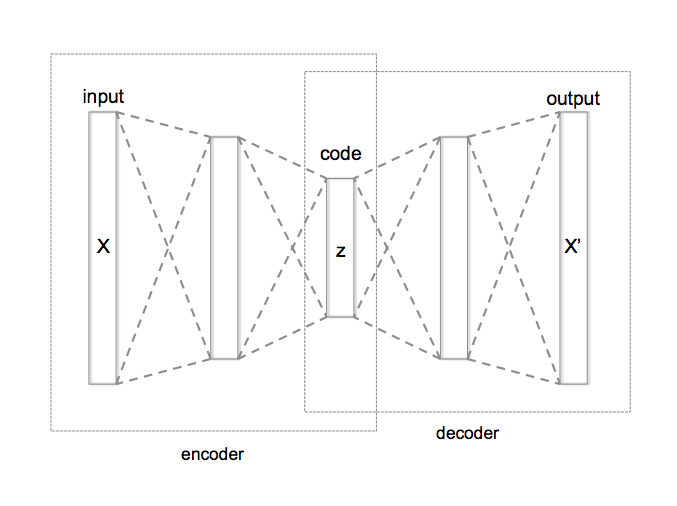

In [43]:
# run models using pca

final_matrics = randomForest_logisticRegression_PCA (data_ohe, 0)
final_matrics

optimal max depth: 10
Random forest with 100 estimators



,F1_score,ROC-AUC
LogisticRegression,0.405982,0.675368
RandomForest,0.444979,0.732717


In [44]:
# run models using AutoEncoder

final_matrics = randomForest_logisticRegression_PCA (data_ohe, 1)
final_matrics

Epoch 1/50
87/87 [==============================] - 1s 7ms/step - loss: 1.2314 - val_loss: 1.2090
Epoch 2/50
87/87 [==============================] - 0s 5ms/step - loss: 1.1796 - val_loss: 1.1430
Epoch 3/50
87/87 [==============================] - 0s 5ms/step - loss: 1.1080 - val_loss: 1.0784
Epoch 4/50
87/87 [==============================] - 0s 5ms/step - loss: 1.0619 - val_loss: 1.0488
Epoch 5/50
87/87 [==============================] - 0s 5ms/step - loss: 1.0409 - val_loss: 1.0342
Epoch 6/50
87/87 [==============================] - 0s 5ms/step - loss: 1.0294 - val_loss: 1.0251
Epoch 7/50
87/87 [==============================] - 0s 5ms/step - loss: 1.0217 - val_loss: 1.0183
Epoch 8/50
87/87 [==============================] - 0s 5ms/step - loss: 1.0154 - val_loss: 1.0126
Epoch 9/50
87/87 [==============================] - 0s 5ms/step - loss: 1.0104 - val_loss: 1.0081
Epoch 10/50
87/87 [==============================] - 0s 5ms/step - loss: 1.0062 - val_loss: 1.0043
Epoch 11/50
87/87 [

,F1_score,ROC-AUC
LogisticRegression,0.299041,0.524167
RandomForest,0.357847,0.625441


To sum up till now: Using OHE do not improve the results not with PCA and not with AutoEncoder. Lets move to do some additional feature engineering.

### PatientId and Neighbourhood features engineering

In [45]:
# create new feature using training set only - replace patient id with the number of appointments scheduled

train_valid, test = train_test_split(
    data_filt, test_size=0.2, random_state=state
)

train, valid = train_test_split(
    train_valid, test_size=0.25, random_state=state
)

pivot = train.pivot_table(index='PatientId', values='No-show', aggfunc=['count', 'sum'])
pivot.columns = ['total', 'no_show']
pivot['perc'] = pivot['no_show']/pivot['total']
dict = pd.Series(pivot.perc.values,index=pivot.index).to_dict()

In [46]:
pivot.sample(5)

,total,no_show,perc
PatientId,,,
1721719343133,2,0,0.0
597645952357838,1,0,0.0
6959997628533,1,0,0.0
8575234528948,2,1,0.5
86469675331133,1,0,0.0


In [47]:
data_filt = data_filt.replace({"PatientId": dict})

In [48]:
# if patient id not in train set replace it with mean of no-show in the dataset

def PatientId_toMean (row):

  if (row > 1):
    row = 0.2
  return row

In [49]:
data_filt['PatientId'] = data_filt['PatientId'].apply(PatientId_toMean)
data_filt.sample(5)

,PatientId,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Is_male,AppointmentWOD,ScheduledHour,ScheduledWOD,day_diff
58961,0.0,2016-05-20,2016-05-24,58,SÃO PEDRO,0,1,0,0,0,1,0,1,1,10,4,4
66674,0.0,2016-05-03,2016-05-03,32,JARDIM CAMBURI,0,0,0,0,0,0,0,0,1,9,1,0
57017,0.0,2016-05-03,2016-05-16,73,ILHA DO BOI,0,0,0,0,0,0,0,1,0,9,1,13
64243,0.5,2016-05-03,2016-05-17,20,CONSOLAÇÃO,0,0,0,0,0,0,1,0,1,7,1,14
68725,0.2,2016-04-29,2016-05-05,47,ESTRELINHA,1,0,0,0,0,1,0,0,3,15,4,6


Now lets check the correlation between the new feature and no-show 

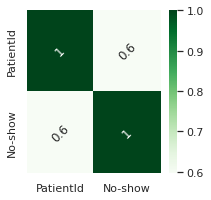

In [50]:
sns.set_theme(style="white")

corr = data_filt[['PatientId', 'No-show']].corr()  # Create the pearson correlation metrix object

fig, ax = plt.subplots(figsize=(3,3)) # create the figure

sns.heatmap(corr, annot=True, cmap='Greens', annot_kws={'rotation':45}) # Draw the heatmap

plt.show()

Looks good. Now lets run again the models

In [51]:
result = randomForest_logisticRegression (data_filt)
result[0]

optimal max depth: 10
Random forest with 100 estimators



,F1_score,ROC-AUC
LogisticRegression,0.315874,0.633041
RandomForest,0.419804,0.709785


Results do not improve at all. Lets add feature engineering of Neighbourhood. I will add relation of arrive and not arrive per neighbourhood as a feature. In order to avoid data leakage I will use train set only to create the no_show rates.

In [52]:
data_filt['Neighbourhoods_show'] = data_filt['Neighbourhood']

train_valid, test = train_test_split(
    data_filt, test_size=0.2, random_state=state
)

train, valid = train_test_split(
    train_valid, test_size=0.25, random_state=state
)

pivot = train.pivot_table(index = 'Neighbourhood', columns='No-show' , values='Age', aggfunc='count')
pivot.columns = ["arrived", "not_arrived"]
pivot['relation'] = pivot['not_arrived']/pivot['arrived']
pivot

,arrived,not_arrived,relation
Neighbourhood,,,
AEROPORTO,5.0,1.0,0.200000
ANDORINHAS,1030.0,317.0,0.307767
ANTÔNIO HONÓRIO,118.0,29.0,0.245763
ARIOVALDO FAVALESSA,139.0,37.0,0.266187
BARRO VERMELHO,197.0,57.0,0.289340
...,...,...,...
SÃO JOSÉ,922.0,245.0,0.265727
SÃO PEDRO,1196.0,303.0,0.253344
TABUAZEIRO,1536.0,340.0,0.221354


In [53]:
# replace null values with 0 - there is not no-show in this neighbourhood

pivot = pivot.fillna(0)

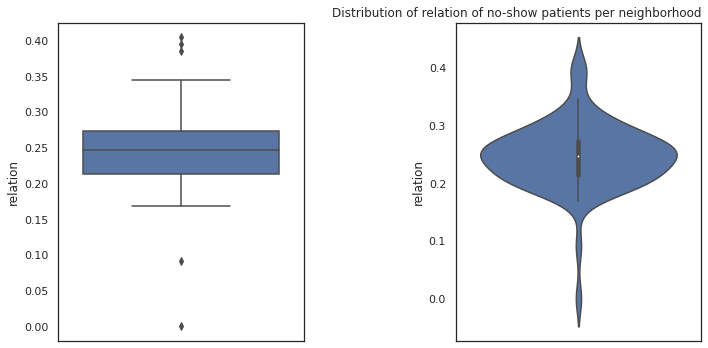

In [54]:
fig, axs = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data=pivot, y='relation', ax=axs[0])
sns.violinplot(data=pivot, y='relation', ax=axs[1])
plt.title("Distribution of relation of no-show patients per neighborhood", loc='right')
fig.tight_layout(w_pad=3)
plt.show()

As expected, our plots are bit different comparing to the above plots, since they represent relation of train set only. Now lets create the new dictionary and insert the values to Neighbourhoods_show

In [55]:
dict = pd.Series(pivot.relation.values,index=pivot.index).to_dict()

In [56]:
data_new = data_filt.replace({"Neighbourhoods_show": dict})

In [57]:
data_new.head()

,PatientId,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Is_male,AppointmentWOD,ScheduledHour,ScheduledWOD,day_diff,Neighbourhoods_show
0,0.0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4,18,4,0,0.194077
1,0.0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,4,16,4,0,0.194077
2,0.2,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4,16,4,0,0.211039
3,0.5,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4,17,4,0,0.230769
4,0.0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4,16,4,0,0.194077


In [58]:
# replace strings to numeric, if the neighbourhood not in the train, fill with the mean

data_new['Neighbourhoods_show'] = pd.to_numeric(data_new['Neighbourhoods_show'], errors='coerce')
data_new.fillna(0.25)
# data_new = data_new.dropna()

,PatientId,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Is_male,AppointmentWOD,ScheduledHour,ScheduledWOD,day_diff,Neighbourhoods_show
0,0.000000,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4,18,4,0,0.194077
1,0.000000,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,4,16,4,0,0.194077
2,0.200000,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4,16,4,0,0.211039
3,0.500000,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4,17,4,0,0.230769
4,0.000000,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4,16,4,0,0.194077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,1.000000,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,0,1,9,1,35,0.258309
110523,0.333333,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,0,1,7,1,35,0.258309
110524,0.000000,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,0,1,16,2,41,0.258309
110525,0.000000,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,0,1,15,2,41,0.258309


Now lets check the correlation

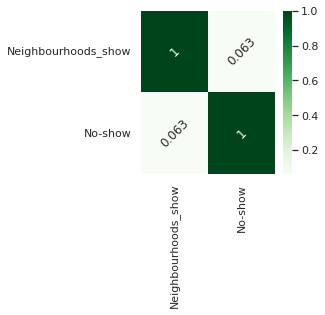

In [59]:
sns.set_theme(style="white")

corr = data_new[['Neighbourhoods_show', 'No-show']].corr()  # Create the pearson correlation metrix object

fig, ax = plt.subplots(figsize=(3,3)) # create the figure

sns.heatmap(corr, annot=True, cmap='Greens', annot_kws={'rotation':45}) # Draw the heatmap

plt.show()

And apply the models

In [60]:
data_new.isnull().sum()

PatientId              0
ScheduledDay           0
AppointmentDay         0
Age                    0
Neighbourhood          0
Scholarship            0
Hipertension           0
Diabetes               0
Alcoholism             0
Handcap                0
SMS_received           0
No-show                0
Is_male                0
AppointmentWOD         0
ScheduledHour          0
ScheduledWOD           0
day_diff               0
Neighbourhoods_show    2
dtype: int64

In [61]:
# drop null value

data_new = data_new.dropna()

In [62]:
result = randomForest_logisticRegression (data_new)
result[0]

optimal max depth: 15
Random forest with 100 estimators



,F1_score,ROC-AUC
LogisticRegression,0.508886,0.781779
RandomForest,0.554237,0.820200


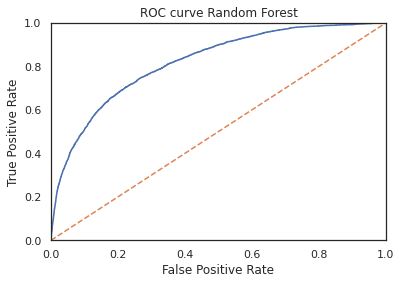

In [63]:
# plot roc-auc graph

fpr, tpr, thresholds = roc_curve(result[1], result[2])

plt.figure()

# plot the graph 
plt.plot(fpr, tpr)
plt.title("ROC curve Random Forest")

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

#  use the functions plt.xlim() and plt.ylim() to set the boundary for the axes from 0 to 1 

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# use the functions plt.xlabel() and plt.ylabel() to name the axes "False Positive Rate" and "True Positive Rate" 

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

Very nice! I achieve nice improvment thanks to feature engineering. Lets try last model with the data_new dataset. I will apply knn and check if results improved. 

In [64]:
# Split the data into train, validation and test

target = data_new['No-show']
try:
  features = data_new.drop(['No-show', 'Neighbourhood', 'ScheduledDay', 'AppointmentDay'], axis=1)
except:
  features = data_new.drop(['No-show'], axis=1)

features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.20, random_state=state
)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, random_state=state
)

  # PCA for dimensionality reduce

pca = PCA(n_components=3)

features_train = pca.fit_transform(features_train)
features_valid = pca.transform(features_valid)

features_train_valid = pca.fit_transform(features_train_valid)
features_test = pca.transform(features_test)
  
  # apply standard scaler

scaler = StandardScaler()

scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

scaler.fit(features_train_valid)
features_train_valid = scaler.transform(features_train_valid)
features_test = scaler.transform(features_test)

In [65]:
# apply knn model

for n in range(1,29,2):
  model = KNeighborsClassifier(n_neighbors=n, weights='distance')
  model.fit(features_train, target_train)
  predicted_valid = model.predict(features_valid)
  print("n_neighbors is:", n, "f1 score is:", f1_score(target_valid, predicted_valid), "roc auc score is:", roc_auc_score(target_valid, predicted_valid))

n_neighbors is: 1 f1 score is: 0.3388467723409143 roc auc score is: 0.5871146995148309
n_neighbors is: 3 f1 score is: 0.3197236955717281 roc auc score is: 0.5788404147755781
n_neighbors is: 5 f1 score is: 0.31344430217669655 roc auc score is: 0.5770990054381859
n_neighbors is: 7 f1 score is: 0.30656552445723256 roc auc score is: 0.5744119407865351
n_neighbors is: 9 f1 score is: 0.30210427556627795 roc auc score is: 0.573305869602519
n_neighbors is: 11 f1 score is: 0.29443152278013407 roc auc score is: 0.570420092805025
n_neighbors is: 13 f1 score is: 0.2935703374531315 roc auc score is: 0.5707990767320026
n_neighbors is: 15 f1 score is: 0.2912265878045346 roc auc score is: 0.5703878540484666
n_neighbors is: 17 f1 score is: 0.2852651136201229 roc auc score is: 0.5682575965917717
n_neighbors is: 19 f1 score is: 0.28121842067272984 roc auc score is: 0.5668562946586643
n_neighbors is: 21 f1 score is: 0.2769365171811299 roc auc score is: 0.5652845851367473
n_neighbors is: 23 f1 score is: 0.

In [66]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(features_train_valid, target_train_valid)
predicted_test = model.predict(features_test)

print("f1 score is:", f1_score(target_test, predicted_test))
print("roc auc score is:", roc_auc_score(target_test, model.predict_proba(features_test)[:,1]))

f1 score is: 0.33619296282481664
roc auc score is: 0.6859429189506798


Well, this results is not better than the previous one. So our best results achieved using Random Forest, where we get F1 score of 0.55 and ROC-AUC of 0.82.

## Conclusion

In this project I try to predict if some patient would not arrive to an appointment he scheduled. This is a binary classification task. Since the data is imbalanced (80:20) accuracy score is not useful and the metrix I used are F1 score and ROC-AUC.

I began the analysis by preprocessing the data including transform categorical to numerical features, filter out problematic rows, tranform object type datas to datatime dates and calculate time difference between scheduled and appointments datas.

Then I move to EDA which helps to fill the data from in between. I see that there is correleation between sms received to no-show and between day_diff to no-show. In addition I explored the distributions of age, Neighbourhoods, and all of the binary features (diabetes, gender etc.)

This investigation prepare the ground to build models and make predictions. I started with baseline model that use the available features, and achieved results of ~0.44 f1 and ~0.73 AUC. The prefareable model was Random Forest. Then I try to encode the Neighbourhood feature using OHE then reduce dimensionality using PCA and fency AutoEncoder but the results was not improved.

It seems that using high level techniques would not help in this situation and what should I do is to create better features. So I engineer the patientIs so that it include the historical of no-show percentage per patient. Important to note: In order to avoid data leakage I create this feature using the training set only, then apply the results to complete data set. This way, the "unknown" target variables of the validation and test sets is not part of creating the feature.

However, This new feature was not so helpful. Only when I combined it with another new feature of relation of no-show per neighbourhood (using the same process) I succeed to sagnificantly improve the predictions quality to f1 score of ~0.55, and AUC of ~0.82. Seems good!

Exactly as in the quote from the begining, I reveal that its all about feature engineering.